In [70]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [71]:
nelems = 4
degree = 2
tol  = 1e-5
ndims = 1

In [72]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [73]:
# prepare residual
ns = function.Namespace()
ns.pi = numpy.pi
ns.x = geom

# construct bases
ns.alpha, ns.beta = function.chain([
    domain.basis( 'std', degree=degree+1),
    domain.basis( 'discont', degree=degree),
])

# solution variables
ns.phi = 'alpha_n ?lhs_n'
ns.u   = 'beta_n ?lhs_n'

# analytical solution
ns.g  = 'cos( 2 pi x_0 )'
ns.dg = '-(2 pi) sin( 2 pi x_0 )'
ns.f  = '(2 pi)^2 cos( 2 pi x_0 )'

In [74]:
# construct residual and inertia vector
res = domain.integral('- alpha_m,0 u + alpha_m phi' @ ns, geometry=ns.x, degree=degree*2)

# construct residual and inertia vector
res += domain.integral('- beta_n phi_,0 + beta_n f' @ ns, geometry=ns.x, degree=degree*2)

# boundary integral
res += domain.boundary.integral('alpha_m g n_0' @ ns, geometry=ns.x, degree=degree*2)

solve > solver returned with residual 1e-15


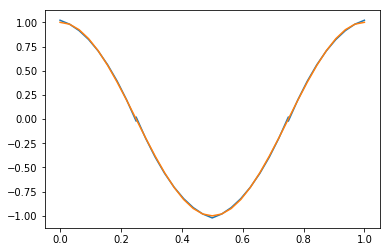

In [75]:
# find lhs such that res == 0 and substitute this lhs in the namespace
lhs = solver.solve_linear('lhs', res)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
x, g = bezier.eval([ns.x, ns.g])
plt.plot(x, u)
plt.plot(x, g)
# plt.ylim(-2,2)